<a href="https://colab.research.google.com/github/Speedbird45Bravo/Keras_projects_21/blob/main/keras_SPI1920_32921.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
from keras.layers import Dense
from keras.models import Sequential
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

url = "https://projects.fivethirtyeight.com/soccer-api/club/spi_matches.csv"
df = pd.read_csv(url, parse_dates=['date']).dropna()
df = df[(df.season == 2019) & (df.league=='Barclays Premier League')]
df['spi_margin'] = np.abs(df['spi1'] - df['spi2'])
X = df[['spi1', 'spi2', 'prob1', 'prob2', 'probtie', 'proj_score1', 'proj_score2', 'importance1', 'importance2', 'score1', 'score2', 'xg1', 'xg2', 'nsxg1', 'nsxg2', 'adj_score1', 'adj_score2']].reset_index(drop=True)
y = df[['spi_margin']].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

In [32]:
ss = StandardScaler().fit(X_train)
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [38]:
model = Sequential()
model.add(Dense(64, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(4))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(X_train_scaled, y_train, epochs=400, batch_size=128, validation_split=0.2, verbose=0)

In [39]:
loss, mae = model.evaluate(X_test_scaled, y_test)
print("Mean Average Error: %.4f" % mae)

3/3 [==============================] - 0s 5ms/step - loss: 1.9637 - mae: 0.8347
Mean Average Error: 0.8347


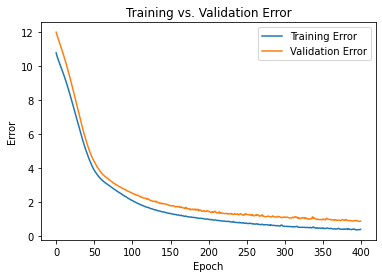

In [41]:
plt.plot(history.history['mae'], label='Training Error')
plt.plot(history.history['val_mae'], label='Validation Error')
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.title("Training vs. Validation Error")
plt.legend()
plt.show()